# Automação de processos

1. buscar, de forma automatica, informaçoes de ações da bolsa de valores
2. criar as analises solicitadas pelo Gestor
3. enviar, automaticamente, um email com os resultados das ánalises 
4. bibliotecas : yfinance , pyautogui , pyperclip

In [1]:
 pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

/tmp/ipykernel_836/1528980158.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  primeiro_preco = historico[0]
/tmp/ipykernel_836/1528980158.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ultimo_preco = historico[-1]
/tmp/ipykernel_836/1528980158.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual = historico[-1]
/tmp/ipykernel_836/1528980158.py:19: FutureWarning: Series.__getitem__ treating keys as positions is de

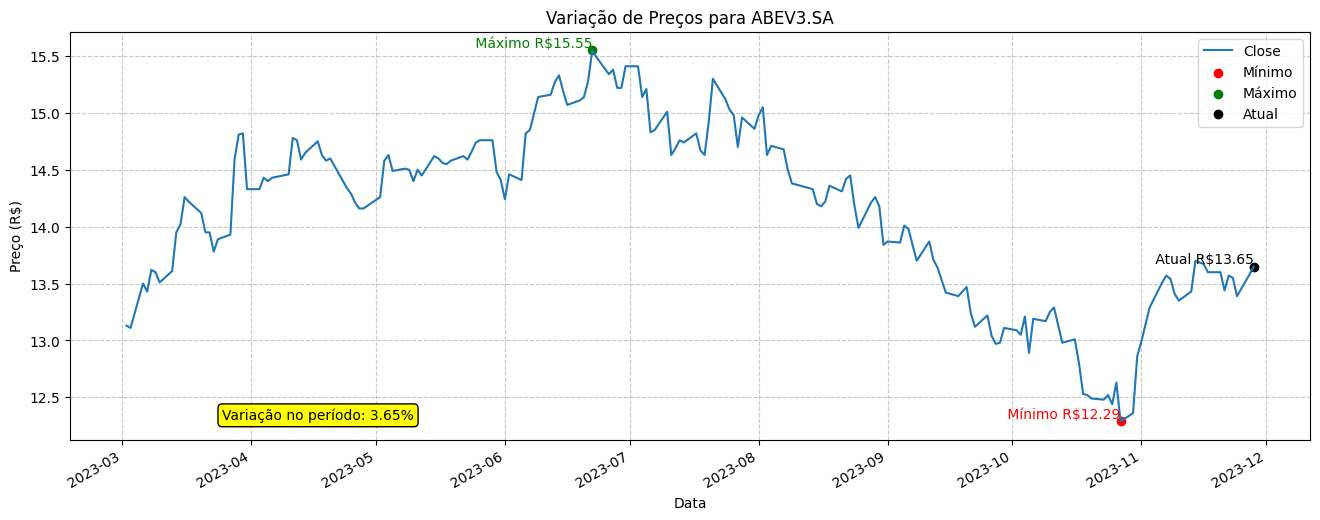

In [30]:
ticker = input('Digite o ticker: ')
preco = yf.Ticker(ticker).history(period='186d')
historico = preco['Close']

primeiro_preco = historico[0]
ultimo_preco = historico[-1]
preco_atual = historico[-1]

porcentagem = ((ultimo_preco - primeiro_preco) / primeiro_preco) * 100

plt.figure(figsize=(16, 6))

# Plotar o histórico
historico.plot()

# Adicionar marcadores para o mínimo, máximo e preço atual
plt.scatter(historico.idxmin(), historico.min(), color='red', label='Mínimo')
plt.scatter(historico.idxmax(), historico.max(), color='green', label='Máximo')
plt.scatter(historico.index[-1], historico[-1], color='black', label='Atual')

# Adicionar textos para os valores
plt.text(historico.idxmin(), historico.min(), f' Mínimo R${historico.min():.2f}', fontsize=10, ha='right', va='bottom', color='red')
plt.text(historico.idxmax(), historico.max(), f' Máximo R${historico.max():.2f}', fontsize=10, ha='right', va='bottom', color='green')
plt.text(historico.index[-1], historico[-1], f' Atual R${historico[-1]:.2f}', fontsize=10, ha='right', va='bottom', color='black')

# Adicionar linhas de grade
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar títulos
plt.title(f"Variação de Preços para {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")

# Exibir a legenda
plt.legend()

# Adicionando destaque
plt.annotate(f'Variação no período: {porcentagem_variacao:.2f}%', xy=(0.2, 0.06), xycoords='axes fraction', ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="yellow"))

plt.show()


# Gerar análises

1. 6 meses dos valores das ações
2. cotação maxima
3. cotação minima
4. media dos preços
5. cotação atual

/tmp/ipykernel_836/2311692112.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  preco_atual = round(float(historico[-1]), 2)


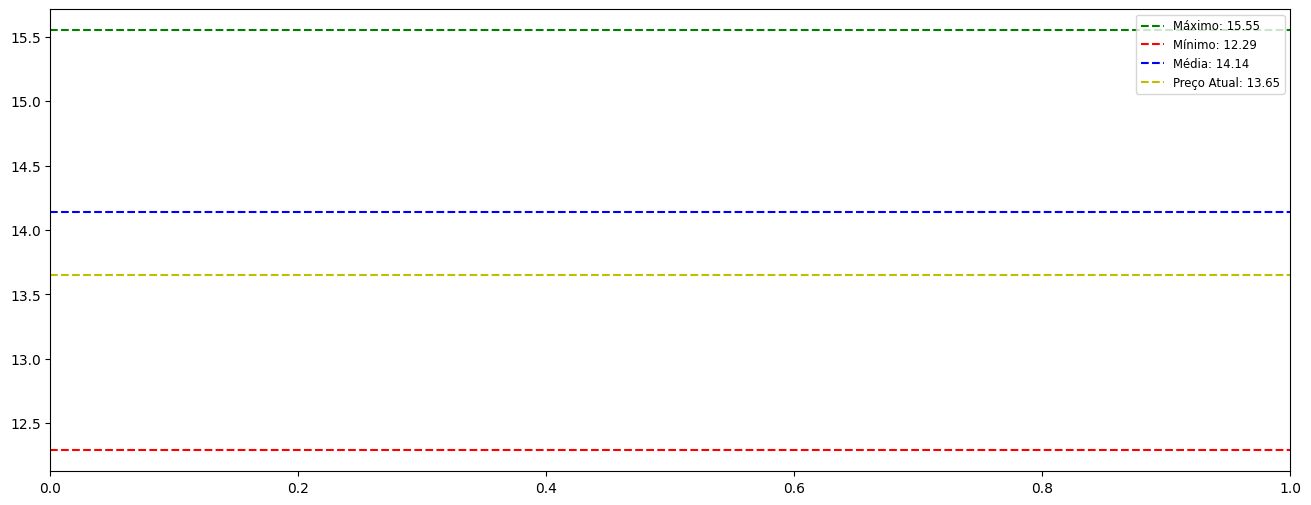

In [31]:
maxima = round(historico.max(), 2)
minima = round(historico.min(), 2)
media= round(historico.mean(), 2)
preco_atual = round(float(historico[-1]), 2)

plt.figure(figsize=(16,6))
plt.axhline(y=maxima, color='g', linestyle='--', label=f'Máximo: {maxima}')
plt.axhline(y=minima, color='r', linestyle='--', label=f'Mínimo: {minima}')
plt.axhline(y=media, color='b', linestyle='--', label=f'Média: {media}')
plt.axhline(y=preco_atual, color='y', linestyle='--', label=f'Preço Atual: {preco_atual}')

plt.legend(fontsize='small')

plt.show()

In [5]:
pip install cryptocompare


Note: you may need to restart the kernel to use updated packages.


In [26]:
import cryptocompare
import pandas as pd

# Ticker para o Bitcoin em dólares (USD)
ticker_btc = 'BTC'

# Obtenha o histórico de preços para o Bitcoin
historico_btc = cryptocompare.get_historical_price_day(
    ticker_btc,
    currency='USD',
    limit=186  # número de dias de histórico desejado
)

# DataFrame para facilitar a manipulação dos dados
df_btc = pd.DataFrame(historico_btc)
df_btc['time'] = pd.to_datetime(df_btc['time'], unit='s')  # Converta a coluna de tempo para o formato datetime
df_btc.set_index('time', inplace=True)  # Defina a coluna de tempo como índice

# Extraia as informações desejadas
primeiro_preco_btc = df_btc['close'].iloc[0]
ultimo_preco_btc = df_btc['close'].iloc[-1]
preco_atual_btc = df_btc['close'].iloc[-1]

# Exiba os resultados
print(f"Primeiro preço do Bitcoin: {primeiro_preco_btc} USD")
print(f"Último preço do Bitcoin: {ultimo_preco_btc} USD")
print(f"Preço atual do Bitcoin: {preco_atual_btc} USD")


Primeiro preço do Bitcoin: 26872.59 USD
Último preço do Bitcoin: 38057.01 USD
Preço atual do Bitcoin: 38057.01 USD


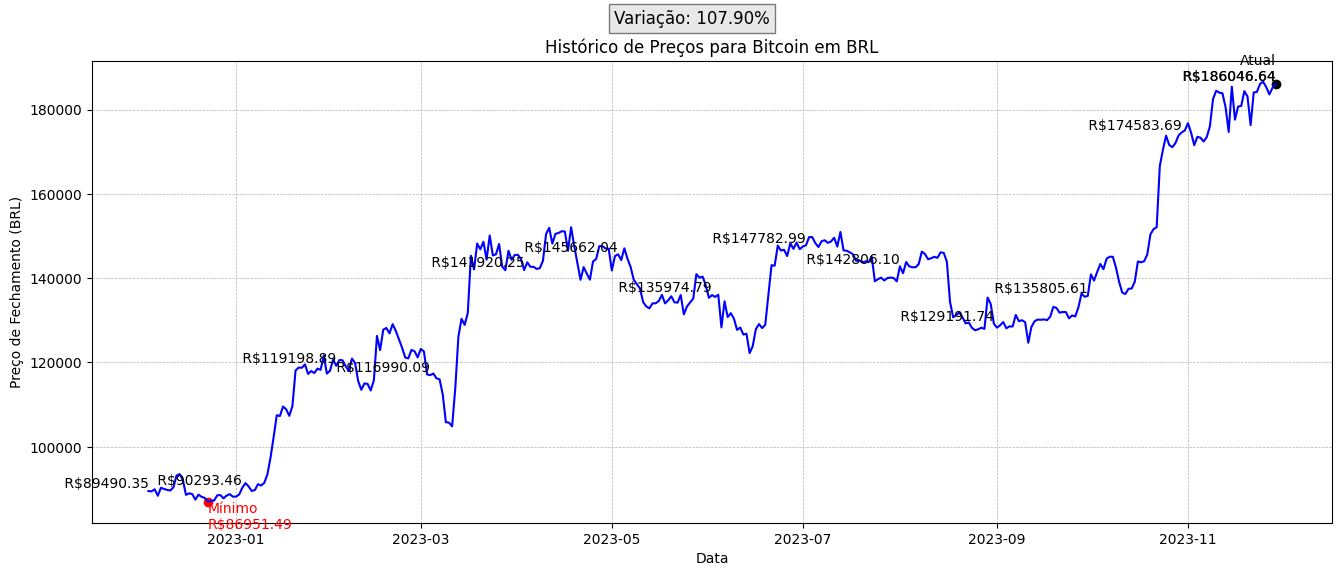

In [24]:
# Ticker para o Bitcoin em Real (BRL)
ticker_btc_brl = 'BTC'

# Obtenha o histórico de preços para o Bitcoin em relação ao Real (BRL)
historico_btc_brl = cryptocompare.get_historical_price_day(
    ticker_btc_brl,
    currency='BRL',
    limit=360  # número de dias de histórico desejado
)

# DataFrame para facilitar a manipulação dos dados
df_btc_brl = pd.DataFrame(historico_btc_brl)
df_btc_brl['time'] = pd.to_datetime(df_btc_brl['time'], unit='s')  # Converta a coluna de tempo para o formato datetime
df_btc_brl.set_index('time', inplace=True)  # Defina a coluna de tempo como índice

# Encontrando o ponto mínimo no período
ponto_minimo_btc_brl = df_btc_brl['close'].idxmin()
valor_ponto_minimo_btc_brl = df_btc_brl['close'].min()

# Calculando a variação percentual
porcentagem_mudanca_btc_brl = ((df_btc_brl['close'].iloc[-1] - df_btc_brl['close'].iloc[0]) / df_btc_brl['close'].iloc[0]) * 100

# Imprimindo informações sobre a mudança percentual no gráfico
info_text_btc_brl = f'Variação: {porcentagem_mudanca_btc_brl:.2f}%'
plt.figure(figsize=(16, 6))
plt.figtext(0.5, 0.95, info_text_btc_brl, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Configurando o gráfico
plt.plot(df_btc_brl['close'], label='Preço de Fechamento', color='blue')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando o preço do Bitcoin em cada ponto do gráfico
for i in range(0, len(df_btc_brl), 30):
    plt.text(df_btc_brl.index[i], df_btc_brl['close'].iloc[i], f' R${df_btc_brl["close"].iloc[i]:.2f}', fontsize=10, ha='right', va='bottom')

# Adicionando marcador para o ponto mínimo com valor e rótulo "Mínimo" (cor verde)
plt.scatter(ponto_minimo_btc_brl, valor_ponto_minimo_btc_brl, color='red')
plt.text(ponto_minimo_btc_brl, valor_ponto_minimo_btc_brl, f'Mínimo\nR${valor_ponto_minimo_btc_brl:.2f}', fontsize=10, ha='left', va='top', color='red')

# Adicionando marcador para o preço atual com valor e rótulo "Atual" (cor vermelha)
plt.scatter(df_btc_brl.index[-1], df_btc_brl['close'].iloc[-1], color='black')
plt.text(df_btc_brl.index[-1], df_btc_brl['close'].iloc[-1], f'Atual\nR${df_btc_brl["close"].iloc[-1]:.2f}', fontsize=10, ha='right', va='bottom', color='black')

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (BRL)')
plt.title(f'Histórico de Preços para Bitcoin em BRL')

plt.show()


[*********************100%%**********************]  1 of 1 completed


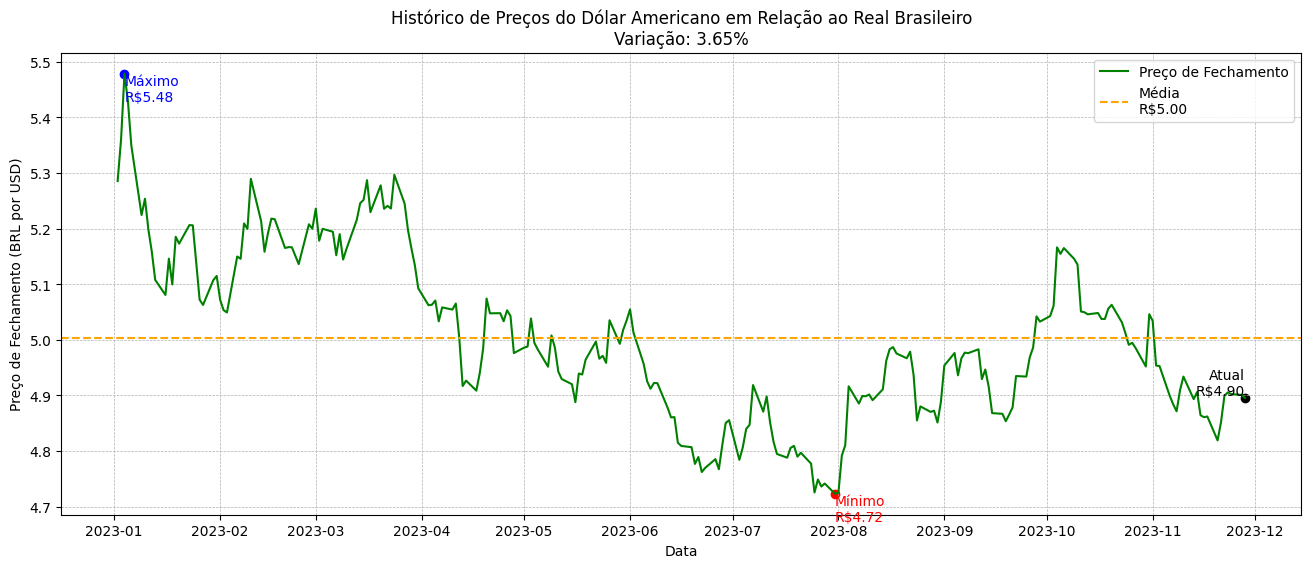

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Ticker para o par de moedas Dólar Americano / Real Brasileiro
ticker_usd_brl = 'USDBRL=X'

# Obtenha o histórico de preços para o Dólar em relação ao Real
historico_usd_brl = yf.download(ticker_usd_brl, start='2023-01-01', end=datetime.today().strftime('%Y-%m-%d')) # END COMO DATA ATUAL


# Encontrando o ponto mínimo, máximo e atual no período
ponto_minimo = historico_usd_brl['Close'].idxmin()
valor_ponto_minimo = historico_usd_brl['Close'].min()

ponto_maximo = historico_usd_brl['Close'].idxmax()
valor_ponto_maximo = historico_usd_brl['Close'].max()

ponto_atual = historico_usd_brl.index[-1]
valor_ponto_atual = historico_usd_brl['Close'].iloc[-1]

# Calcular a porcentagem de variação no período
porcentagem_variacao = ((valor_ponto_atual - valor_ponto_minimo) / valor_ponto_minimo) * 100

# Calcular a média
media = historico_usd_brl['Close'].mean()

# Configurando o gráfico
plt.figure(figsize=(16, 6))
plt.plot(historico_usd_brl['Close'], label='Preço de Fechamento', color='green')

# Adicionando linhas de grade
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (BRL por USD)')
plt.title(f'Histórico de Preços do Dólar Americano em Relação ao Real Brasileiro\nVariação: {porcentagem_variacao:.2f}%')

# Adicionando marcador para o ponto mínimo com valor e rótulo "Mínimo" (cor vermelha)
plt.scatter(ponto_minimo, valor_ponto_minimo, color='red')
plt.text(ponto_minimo, valor_ponto_minimo, f'Mínimo\nR${valor_ponto_minimo:.2f}', fontsize=10, ha='left', va='top', color='red')

# Adicionando marcador para o ponto máximo com valor e rótulo "Máximo" (cor azul)
plt.scatter(ponto_maximo, valor_ponto_maximo, color='blue')
plt.text(ponto_maximo, valor_ponto_maximo, f'Máximo\nR${valor_ponto_maximo:.2f}', fontsize=10, ha='left', va='top', color='blue')

# Adicionando marcador para o ponto atual com valor e rótulo "Atual" (cor preta)
plt.scatter(ponto_atual, valor_ponto_atual, color='black')
plt.text(ponto_atual, valor_ponto_atual, f'Atual\nR${valor_ponto_atual:.2f}', fontsize=10, ha='right', va='bottom', color='black')

# Adicionando linha média (cor laranja)
plt.axhline(y=media, color='orange', linestyle='--', label=f'Média\nR${media:.2f}')

# Adicionando legenda
plt.legend()

plt.show()
